In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

In [2]:
ls crime_data_raw/2011

apr11.xls*  dec11.xls*  jan11.xls*  jun11.xls*  may11.xls*  oct11.xls*
aug11.xls*  feb11.xls*  jul11.xls*  mar11.xls*  nov11.xls*  sep11.xls*


In [3]:
path = 'crime_data_raw/2011'

In [4]:
ls crime_data_raw/

10years/    2008/          2011_raw.csv*  2014/          2016_raw.csv*
1985_2014/  2009/          2012/          2014_raw.csv*  2017/
2005/       2010/          2012_raw.csv*  2015/          2017_raw.csv*
2006/       2010_raw.csv*  2013/          2015_raw.csv*  premise_codes.csv*
2007/       2011/          2013_raw.csv*  2016/


In [5]:
# get premise codes

pc = pd.read_csv('crime_data_raw/premise_codes.csv')
pc.head()

,Premise Type,Premise Description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [6]:
# rename premise column for easy merge
pc.rename(columns={'Premise Type': 'Premise',}, inplace=True)
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
Premise                126 non-null object
Premise Description    126 non-null object
dtypes: object(2)
memory usage: 2.0+ KB


In [7]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 

df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [8]:
df.Hour.value_counts(dropna=False)

18    7895
0     7855
12    7261
19    7167
20    7103
22    7097
17    7090
21    6717
15    6242
16    6099
23    6038
14    5660
13    5398
10    5111
11    5058
8     5057
9     4673
7     4191
1     3561
2     3234
6     2855
3     2493
5     1946
4     1858
Name: Hour, dtype: int64

In [9]:
df['Hour'] = df['Hour'].astype(str) + ':00'

In [10]:
df.to_csv('crime_data_raw/2011_raw.csv')

In [11]:
path = 'crime_data_raw/2011_raw.csv'
df = pd.read_csv(path,parse_dates=[['Date', 'Hour']])

In [12]:
df.head()

,Date_Hour,Unnamed: 0,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,# Of Offenses
0,2011-04-13 01:00:00,0,Murder,17E40,20A,6400-6499,BANKSIDE,DR,-,1
1,2011-04-06 14:00:00,1,Murder,20G30,20A,2900-2999,HAYES,RD,-,1
2,2011-01-10 19:00:00,2,Murder,13D20,20R,8400-8499,GLENSCOT,-,-,1
3,2011-04-03 23:00:00,3,Murder,19G50,18N,10700-10799,BELLFORT,ST,W,1
4,2011-04-17 23:00:00,4,Murder,11H20,20A,2500-2599,BROADWAY,ST,-,1


## Inspect Premise col

In [13]:
len(df.Premise.value_counts(dropna=False))

127

In [14]:
df.Premise.value_counts(dropna=False).head()

20A    17514
20R    17271
18A    13946
13R     8758
20D     7690
Name: Premise, dtype: int64

In [15]:
df.Premise.unique()

array(['20A', '20R', '18N', '20D', '13R', '11R', '250', '18O', '20P',
       '22H', '20W', '09H', '22M', '140', '13S', '18A', '240', '03B',
       '100', '20V', '20C', '09R', '01P', '120', '18C', '13H', '18B',
       '070', '18G', '05Z', '080', '20G', '23S', '05M', '18T', '02B',
       '18L', '05O', '05X', '18R', '13B', '24E', '18U', '05C', '210',
       '09D', '05B', '20M', '18P', '18W', '24C', '18S', '02S', '160',
       '01K', '05E', '040', '24P', '05D', '05P', '18M', '05Q', '170',
       '22P', '05L', '18H', '03S', '22E', '05R', '11G', '25R', '05H',
       '13A', '150', '05S', '01B', '22D', '12V', '060', '24V', '05V',
       '190', '05G', '25V', '05F', '05N', '05Y', '09P', '19V', '24T',
       '11L', '05W', '04V', '11F', '22C', '11S', '05T', '24J', '24F',
       '20L', '21V', '24A', '---', '20N', '24S', '22U', '11P', '22V',
       '05U', '01A', '01R', '05A', '18D', '11C', '13T', '24G', '20H',
       '14V', '11V', '23C', '02C', '01T', '24B', '09V', '24M', '06', 'N'],
      dtype=obj

In [16]:
df.Premise = df.Premise.str.strip()

In [17]:
len(df.Premise.value_counts(dropna=False))

127

In [18]:
df.Premise.value_counts(dropna=False).head()

20A    17514
20R    17271
18A    13946
13R     8758
20D     7690
Name: Premise, dtype: int64

In [19]:
# check if  null values
df.isnull().values.any().any()

False

In [20]:
# check su, of null values
df.isnull().values.sum()

0

In [21]:
len(df[df.isnull().any(axis=1)])

0

## Visualize our data

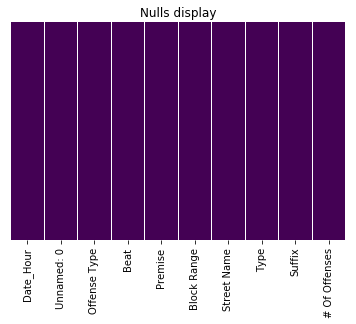

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Nulls display')
plt.show()

## col cleaning

- joining similar columns
- renaming

In [23]:
df.head()

,Date_Hour,Unnamed: 0,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,# Of Offenses
0,2011-04-13 01:00:00,0,Murder,17E40,20A,6400-6499,BANKSIDE,DR,-,1
1,2011-04-06 14:00:00,1,Murder,20G30,20A,2900-2999,HAYES,RD,-,1
2,2011-01-10 19:00:00,2,Murder,13D20,20R,8400-8499,GLENSCOT,-,-,1
3,2011-04-03 23:00:00,3,Murder,19G50,18N,10700-10799,BELLFORT,ST,W,1
4,2011-04-17 23:00:00,4,Murder,11H20,20A,2500-2599,BROADWAY,ST,-,1


In [24]:
# # 2014
# # if duplicate columns

# df['BlockRange'] = pd.concat([df['Block Range'].dropna(),
#                               df['BlockRange'].dropna()]).reindex_like(df)

# df['StreetName'] = pd.concat([df['Street Name'].dropna(),
#                               df['StreetName'].dropna()]).reindex_like(df)

# df['# Of Offenses'] = pd.concat([df['# Of'].dropna(),
#                               df['# Of Offenses'].dropna(),
#                               df['# offenses'].dropna(),
#                               df['# Offenses'].dropna()]).reindex_like(df)

In [25]:
df.head()

,Date_Hour,Unnamed: 0,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,# Of Offenses
0,2011-04-13 01:00:00,0,Murder,17E40,20A,6400-6499,BANKSIDE,DR,-,1
1,2011-04-06 14:00:00,1,Murder,20G30,20A,2900-2999,HAYES,RD,-,1
2,2011-01-10 19:00:00,2,Murder,13D20,20R,8400-8499,GLENSCOT,-,-,1
3,2011-04-03 23:00:00,3,Murder,19G50,18N,10700-10799,BELLFORT,ST,W,1
4,2011-04-17 23:00:00,4,Murder,11H20,20A,2500-2599,BROADWAY,ST,-,1


In [26]:
# df.rename(columns={
#     '# Of Offenses': 'NumOffenses',
#      'Offense Type': 'OffenseType',
# }, inplace=True)
# df.info()

In [27]:
df.rename(columns={
    '# Of Offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
    'Block Range': 'BlockRange',
    'Street Name': 'StreetName'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127659 entries, 0 to 127658
Data columns (total 10 columns):
Date_Hour      127659 non-null datetime64[ns]
Unnamed: 0     127659 non-null int64
OffenseType    127659 non-null object
Beat           127659 non-null object
Premise        127659 non-null object
BlockRange     127659 non-null object
StreetName     127659 non-null object
Type           127659 non-null object
Suffix         127659 non-null object
NumOffenses    127659 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.7+ MB


## Subset dataframe to work on 

In [28]:
crimes = df[['Date_Hour','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127659 entries, 0 to 127658
Data columns (total 7 columns):
Date_Hour      127659 non-null datetime64[ns]
Beat           127659 non-null object
BlockRange     127659 non-null object
StreetName     127659 non-null object
OffenseType    127659 non-null object
Premise        127659 non-null object
NumOffenses    127659 non-null int64
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 6.8+ MB


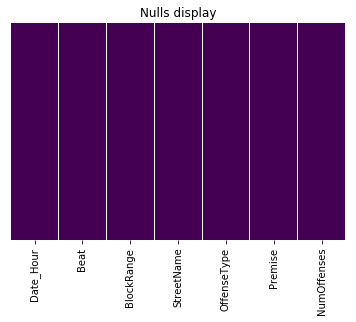

In [29]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Nulls display')
plt.show()

# FIND NAN onevery col

In [30]:
crimes[crimes.Date_Hour.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [31]:
len(crimes[crimes.Beat.isnull()])

0

In [32]:
crimes[crimes.Beat.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [33]:
len(crimes[crimes.BlockRange.isnull()])

0

In [34]:
crimes[crimes.BlockRange.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [35]:
len(crimes[crimes.StreetName.isnull()])

0

In [36]:
crimes[crimes.StreetName.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [37]:
len(crimes[crimes.OffenseType.isnull()])

0

In [38]:
crimes[crimes.OffenseType.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [39]:
len(crimes[crimes.Premise.isnull()])

0

In [40]:
crimes[crimes.Premise.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [41]:
len(crimes[crimes.NumOffenses.isnull()])

0

In [42]:
crimes[crimes.NumOffenses.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


## Find NaN in rows and delete
- drop if > 2 nan

In [43]:
len(crimes[crimes.isnull().any(axis=1)])

0

In [44]:
crimes[crimes.isnull().any(axis=1)]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [45]:
#crimes = crimes.dropna(thresh=2)

In [46]:
#crimes[crimes.isnull().any(axis=1)]

## Joint dataframes

In [47]:
# join two datarames
crimes = pd.merge(crimes, pc, on='Premise', how='outer')
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127662 entries, 0 to 127661
Data columns (total 8 columns):
Date_Hour              127659 non-null datetime64[ns]
Beat                   127659 non-null object
BlockRange             127659 non-null object
StreetName             127659 non-null object
OffenseType            127659 non-null object
Premise                127662 non-null object
NumOffenses            127659 non-null float64
Premise Description    127574 non-null object
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 8.8+ MB


In [48]:
crimes.head()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
0,2011-04-13 01:00:00,17E40,6400-6499,BANKSIDE,Murder,20A,1.0,APARTMENT
1,2011-04-06 14:00:00,20G30,2900-2999,HAYES,Murder,20A,1.0,APARTMENT
2,2011-04-17 23:00:00,11H20,2500-2599,BROADWAY,Murder,20A,1.0,APARTMENT
3,2011-04-21 15:00:00,17E10,5900-5999,BELLAIRE,Rape,20A,1.0,APARTMENT
4,2011-04-10 20:00:00,17E40,12500-12599,DUNLAP,Rape,20A,1.0,APARTMENT


In [49]:
len(crimes[crimes['Premise Description'].isnull()])

88

In [50]:
crimes[crimes['Premise Description'].isnull()].head()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
126699,2011-04-20 18:00:00,19G10,10800-10899,BEECHNUT,Auto Theft,---,1.0,NaN
126700,2011-04-15 11:00:00,20G30,10400-10499,RICHMOND,Theft,---,1.0,NaN
126701,2011-05-07 15:00:00,1A10,1200-1299,TRAVIS,Rape,---,1.0,NaN
126702,2011-05-01 00:00:00,20G10,9900-9999,RICHMOND,Theft,---,1.0,NaN
126703,2011-08-15 19:00:00,19G10,6800-6899,WEST SAM HOUSTON,Theft,---,1.0,NaN


## Problem
- find nan values on one col, and copy related col

In [51]:
crimes.Premise.unique()

array(['20A', '20R', '18N', '20D', '13R', '11R', '250', '18O', '20P',
       '22H', '20W', '09H', '22M', '140', '13S', '18A', '240', '03B',
       '100', '20V', '20C', '09R', '01P', '120', '18C', '13H', '18B',
       '070', '18G', '05Z', '080', '20G', '23S', '05M', '18T', '02B',
       '18L', '05O', '05X', '18R', '13B', '24E', '18U', '05C', '210',
       '09D', '05B', '20M', '18P', '18W', '24C', '18S', '02S', '160',
       '01K', '05E', '040', '24P', '05D', '05P', '18M', '05Q', '170',
       '22P', '05L', '18H', '03S', '22E', '05R', '11G', '25R', '05H',
       '13A', '150', '05S', '01B', '22D', '12V', '060', '24V', '05V',
       '190', '05G', '25V', '05F', '05N', '05Y', '09P', '19V', '24T',
       '11L', '05W', '04V', '11F', '22C', '11S', '05T', '24J', '24F',
       '20L', '21V', '24A', '---', '20N', '24S', '22U', '11P', '22V',
       '05U', '01A', '01R', '05A', '18D', '11C', '13T', '24G', '20H',
       '14V', '11V', '23C', '02C', '01T', '24B', '09V', '24M', '06', 'N',
       '02V', '1

In [52]:
len(crimes[crimes['Premise'] == '---'])

84

In [53]:
len(crimes[crimes['Premise'] == 'N'])

1

In [54]:
crimes[crimes['Premise'] == 'N']

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
127658,2011-10-28,5F30,7500-7599,LANGTRY,Theft,N,1.0,NaN


In [55]:
crimes.loc[crimes['Premise Description'].isnull(),'Premise Description'] = crimes['Premise']

In [56]:
len(crimes[crimes['Premise Description'].isnull()])

0

In [57]:
crimes[crimes['Premise'] == 'N'].head()


,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
127658,2011-10-28,5F30,7500-7599,LANGTRY,Theft,N,1.0,N


## Visualize data

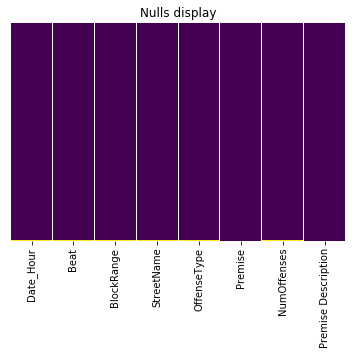

In [58]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Nulls display')
plt.show()

## Display any null values

In [59]:
len(crimes[crimes.isnull().any(axis=1)])

3

In [60]:
crimes[crimes.isnull().any(axis=1)].tail()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
127659,NaT,NaN,NaN,NaN,NaN,02V,NaN,VACANT BANK
127660,NaT,NaN,NaN,NaN,NaN,13C,NaN,CONTRA-FLOW/HOV
127661,NaT,NaN,NaN,NaN,NaN,15V,NaN,VACANT JAIL/PRISON


## drop rows with 2 or 3 or more NaN

In [61]:
crimes = crimes.dropna(thresh=3)

In [62]:
len(crimes[crimes.isnull().any(axis=1)])

0

In [63]:
crimes[crimes.isnull().any(axis=1)].tail()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description


## Inspect each column

In [64]:
crimes.dtypes

Date_Hour              datetime64[ns]
Beat                           object
BlockRange                     object
StreetName                     object
OffenseType                    object
Premise                        object
NumOffenses                   float64
Premise Description            object
dtype: object

## Beat

In [65]:
len(crimes.Beat.value_counts())

121

In [66]:
len(crimes.Beat.value_counts(dropna=False))

121

In [67]:
crimes.Beat.unique()

array(['17E40', '20G30', '11H20', '17E10', '2A60', '18F60', '18F20',
       '7C20', '5F10', '18F50', '9C40', '6B50', '17E30', '19G10', '20G70',
       '5F40', '11H50', '14D40', '19G50', '6B20', '17E20', '14D20',
       '1A20', '1A50', '5F30', '19G20', '15E40', '13D20', '6B10', '11H30',
       '6B30', '12D10', '18F40', '20G10', '12D30', '20G40', '18F30',
       '6B60', '8C10', '10H40', '14D10', '15E30', '20G60', '3B10',
       '10H10', '6B40', '13D10', '2A50', '5F20', '10H70', '10H60',
       '19G30', '10H20', '24C10', '16E30', '2A10', '4F10', '12D40',
       '10H50', '12D20', '3B30', '15E20', '19G40', '2A30', '8C20', '4F20',
       '3B40', '11H10', '8C50', '12D70', '13D40', '1A30', '7C30', '20G80',
       '16E20', '20G20', '7C10', '24C20', '14D50', '8C60', '15E10',
       '18F10', '20G50', '14D30', '24C50', '8C30', '2A20', '16E10',
       '7C50', '4F30', '12D60', '10H80', '3B50', '24C40', '7C40', '16E40',
       '10H30', '1A40', '9C30', '12D50', '24C30', '9C20', '2A40', '1A10',
       

In [68]:
# replace extra ' with empty space
crimes['Beat'] = crimes.Beat.str.replace("'", " ")

In [69]:
len(crimes.Beat.value_counts(dropna=False))

121

In [70]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [71]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

121

In [72]:
crimes.Beat.unique()

array(['17E40', '20G30', '11H20', '17E10', '2A60', '18F60', '18F20',
       '7C20', '5F10', '18F50', '9C40', '6B50', '17E30', '19G10', '20G70',
       '5F40', '11H50', '14D40', '19G50', '6B20', '17E20', '14D20',
       '1A20', '1A50', '5F30', '19G20', '15E40', '13D20', '6B10', '11H30',
       '6B30', '12D10', '18F40', '20G10', '12D30', '20G40', '18F30',
       '6B60', '8C10', '10H40', '14D10', '15E30', '20G60', '3B10',
       '10H10', '6B40', '13D10', '2A50', '5F20', '10H70', '10H60',
       '19G30', '10H20', '24C10', '16E30', '2A10', '4F10', '12D40',
       '10H50', '12D20', '3B30', '15E20', '19G40', '2A30', '8C20', '4F20',
       '3B40', '11H10', '8C50', '12D70', '13D40', '1A30', '7C30', '20G80',
       '16E20', '20G20', '7C10', '24C20', '14D50', '8C60', '15E10',
       '18F10', '20G50', '14D30', '24C50', '8C30', '2A20', '16E10',
       '7C50', '4F30', '12D60', '10H80', '3B50', '24C40', '7C40', '16E40',
       '10H30', '1A40', '9C30', '12D50', '24C30', '9C20', '2A40', '1A10',
       

In [73]:
crimes.Beat.value_counts(dropna=False).head()

19G10    3029
12D10    2761
6B60     2717
3B10     2578
13D20    2390
Name: Beat, dtype: int64

## BlockRange

In [74]:
len(crimes.BlockRange.value_counts(dropna=False))

254

In [75]:
crimes.BlockRange.value_counts(dropna=False).head()

900-999      1731
100-199      1638
800-899      1631
9400-9499    1603
700-799      1601
Name: BlockRange, dtype: int64

In [76]:
# strip
crimes.BlockRange = crimes.BlockRange.str.strip()

In [77]:
len(crimes.BlockRange.value_counts(dropna=False))

254

## StreetName

In [78]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7537


In [79]:
crimes.StreetName = crimes.StreetName.str.strip()

In [80]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7537


In [81]:
print(crimes.StreetName.value_counts(dropna=False).head())

WESTHEIMER    3587
GESSNER       1846
GULF          1801
NORTH         1763
RICHMOND      1713
Name: StreetName, dtype: int64


## OffenseType

In [82]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:7


In [83]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [84]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:7


In [85]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 68596
Burglary              27459
Auto Theft            11893
Aggravated Assault    10695
Robbery                8054
Rape                    770
Murder                  192
Name: OffenseType, dtype: int64


## Premise

In [86]:
print('before:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

before:127


In [87]:
crimes.Premise = crimes.Premise.str.strip()

In [88]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:127


In [89]:
crimes.Premise.value_counts(dropna=False).head()

20A    17514
20R    17271
18A    13946
13R     8758
20D     7690
Name: Premise, dtype: int64

## Premise Description

In [90]:
print('before:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

before:127


In [91]:
#crimes.Beat = crimes.Beat.str.replace(r"\'(.+?)\'", ' ')
crimes['Premise Description'] = crimes['Premise Description'].str.strip()

In [92]:
print('after:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

after:127


In [93]:
print(crimes['Premise Description'].value_counts(dropna=False).head())

APARTMENT                17514
RESIDENCE/HOUSE          17271
APARTMENT PARKING LOT    13946
ROAD/STREET/SIDEWALK      8758
DRIVEWAY                  7690
Name: Premise Description, dtype: int64


# Set Date as index

In [94]:
# date
crimes.Date_Hour = pd.to_datetime(crimes.Date_Hour)

crimes = crimes.set_index('Date_Hour').sort_index(ascending=True)

In [95]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
Date_Hour,,,,,,,
1964-10-09 05:00:00,1A40,3700-3799,WESTHEIMER,Aggravated Assault,18O,1.0,OTHER PARKING LOT
1965-03-20 23:00:00,6B60,12400-12499,GREENSPOINT,Theft,09H,1.0,HOSPITAL
1966-10-27 00:00:00,6B50,10300-10399,NORTH,Theft,210,1.0,RESTAURANT/CAFETERIA
1970-11-27 13:00:00,19G50,10200-10299,LANDS END,Theft,250,1.0,OTHER/UNKNOWN
1971-08-16 22:00:00,14D20,9000-9099,BRANDON,Theft,20D,1.0,DRIVEWAY


## Create Columns with day,weekday,month,year from date index

In [96]:
# get day, weekday,month ,year

crimes['Hour'] = crimes.index.strftime('%H')

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [97]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,,
1964-10-09 05:00:00,1A40,3700-3799,WESTHEIMER,Aggravated Assault,18O,1.0,OTHER PARKING LOT,05,09,Friday,Oct,1964
1965-03-20 23:00:00,6B60,12400-12499,GREENSPOINT,Theft,09H,1.0,HOSPITAL,23,20,Saturday,Mar,1965
1966-10-27 00:00:00,6B50,10300-10399,NORTH,Theft,210,1.0,RESTAURANT/CAFETERIA,00,27,Thursday,Oct,1966
1970-11-27 13:00:00,19G50,10200-10299,LANDS END,Theft,250,1.0,OTHER/UNKNOWN,13,27,Friday,Nov,1970
1971-08-16 22:00:00,14D20,9000-9099,BRANDON,Theft,20D,1.0,DRIVEWAY,22,16,Monday,Aug,1971


## null values

- check
- count
- display

In [98]:
crimes.isnull().values.any().any()

False

In [99]:
# display any null

len(crimes[crimes.isnull().any(axis=1)])

0

In [100]:
crimes[crimes.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,,


In [101]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127659 entries, 1964-10-09 05:00:00 to 2011-12-31 23:00:00
Data columns (total 12 columns):
Beat                   127659 non-null object
BlockRange             127659 non-null object
StreetName             127659 non-null object
OffenseType            127659 non-null object
Premise                127659 non-null object
NumOffenses            127659 non-null float64
Premise Description    127659 non-null object
Hour                   127659 non-null object
day                    127659 non-null object
weekday                127659 non-null object
month                  127659 non-null object
year                   127659 non-null object
dtypes: float64(1), object(11)
memory usage: 15.2+ MB


## New Dataframe
- remove premise col
- keep premise description

In [102]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise Description','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
1964-10-09 05:00:00,1A40,3700-3799,WESTHEIMER,Aggravated Assault,OTHER PARKING LOT,1.0,05,09,Friday,Oct,1964
1965-03-20 23:00:00,6B60,12400-12499,GREENSPOINT,Theft,HOSPITAL,1.0,23,20,Saturday,Mar,1965
1966-10-27 00:00:00,6B50,10300-10399,NORTH,Theft,RESTAURANT/CAFETERIA,1.0,00,27,Thursday,Oct,1966
1970-11-27 13:00:00,19G50,10200-10299,LANDS END,Theft,OTHER/UNKNOWN,1.0,13,27,Friday,Nov,1970
1971-08-16 22:00:00,14D20,9000-9099,BRANDON,Theft,DRIVEWAY,1.0,22,16,Monday,Aug,1971


In [103]:
crime_yr.isnull().values.any().any()

False

In [104]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [105]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


# FIND NANS

## INDEX

In [106]:
len(crime_yr[crime_yr.index.isnull()])

0

In [107]:
crime_yr[crime_yr.index.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [108]:
# drop index nans
crime_yr.index.dropna(how='any')

DatetimeIndex(['1964-10-09 05:00:00', '1965-03-20 23:00:00',
               '1966-10-27 00:00:00', '1970-11-27 13:00:00',
               '1971-08-16 22:00:00', '1972-02-09 13:00:00',
               '1972-10-20 22:00:00', '1976-04-15 18:00:00',
               '1977-12-17 23:00:00', '1978-06-29 07:00:00',
               ...
               '2011-12-31 21:00:00', '2011-12-31 21:00:00',
               '2011-12-31 21:00:00', '2011-12-31 21:00:00',
               '2011-12-31 22:00:00', '2011-12-31 22:00:00',
               '2011-12-31 23:00:00', '2011-12-31 23:00:00',
               '2011-12-31 23:00:00', '2011-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Date_Hour', length=127659, freq=None)

In [109]:
len(crime_yr[crime_yr.index.isnull()])

0

## Beat

In [110]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [111]:
crime_yr[crime_yr.Beat.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [112]:
crime_yr.Beat = crime_yr.Beat.replace(np.nan, 'UNK')

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [113]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [114]:
crime_yr[crime_yr.Beat.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## BlockRAnge

In [115]:
len(crime_yr[crime_yr.BlockRange.isnull()])

0

In [116]:
crime_yr[crime_yr.BlockRange.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## StreetName

In [117]:
len(crime_yr[crime_yr.StreetName.isnull()])

0

In [118]:
crime_yr[crime_yr.StreetName.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## OffenseType

In [119]:
len(crime_yr[crime_yr.OffenseType.isnull()])

0

In [120]:
crime_yr[crime_yr.OffenseType.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## Hour

In [121]:
len(crime_yr[crime_yr.Hour.isnull()])

0

In [122]:
crime_yr[crime_yr.Hour.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## Premsie Description

In [123]:
len(crime_yr[crime_yr['Premise Description'].isnull()])

0

In [124]:
crime_yr[crime_yr['Premise Description'].isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [125]:
crime_yr['Premise Description'] = crime_yr['Premise Description'].replace(np.nan, 'No label')

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [126]:
len(crime_yr[crime_yr['Premise Description'].isnull()])

0

In [127]:
crime_yr[crime_yr['Premise Description'].isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [128]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [129]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## Save

In [130]:
# change column name from Premise Descriptionto Premise

crime_yr.rename(columns={
    'Premise Description': 'Premise',}, inplace=True)
crime_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127659 entries, 1964-10-09 05:00:00 to 2011-12-31 23:00:00
Data columns (total 11 columns):
Beat           127659 non-null object
BlockRange     127659 non-null object
StreetName     127659 non-null object
OffenseType    127659 non-null object
Premise        127659 non-null object
NumOffenses    127659 non-null float64
Hour           127659 non-null object
day            127659 non-null object
weekday        127659 non-null object
month          127659 non-null object
year           127659 non-null object
dtypes: float64(1), object(10)
memory usage: 11.7+ MB


/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [131]:
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
1964-10-09 05:00:00,1A40,3700-3799,WESTHEIMER,Aggravated Assault,OTHER PARKING LOT,1.0,05,09,Friday,Oct,1964
1965-03-20 23:00:00,6B60,12400-12499,GREENSPOINT,Theft,HOSPITAL,1.0,23,20,Saturday,Mar,1965
1966-10-27 00:00:00,6B50,10300-10399,NORTH,Theft,RESTAURANT/CAFETERIA,1.0,00,27,Thursday,Oct,1966
1970-11-27 13:00:00,19G50,10200-10299,LANDS END,Theft,OTHER/UNKNOWN,1.0,13,27,Friday,Nov,1970
1971-08-16 22:00:00,14D20,9000-9099,BRANDON,Theft,DRIVEWAY,1.0,22,16,Monday,Aug,1971


In [132]:
ls crime_data_clean/years

Final_crime10_clean.csv*  Final_crime13_clean.csv*  Final_crime16_clean.csv*
Final_crime11_clean.csv*  Final_crime14_clean.csv*  Final_crime17_clean.csv*
Final_crime12_clean.csv*  Final_crime15_clean.csv*


In [133]:
crime_yr.to_csv('crime_data_clean/years/Final_crime11_clean.csv')

In [134]:
ls crime_data_clean/years

Final_crime10_clean.csv*  Final_crime13_clean.csv*  Final_crime16_clean.csv*
Final_crime11_clean.csv*  Final_crime14_clean.csv*  Final_crime17_clean.csv*
Final_crime12_clean.csv*  Final_crime15_clean.csv*


In [136]:
crime_yr.Hour.value_counts()

18    7895
00    7855
12    7261
19    7167
20    7103
22    7097
17    7090
21    6717
15    6242
16    6099
23    6038
14    5660
13    5398
10    5111
11    5058
08    5057
09    4673
07    4191
01    3561
02    3234
06    2855
03    2493
05    1946
04    1858
Name: Hour, dtype: int64